In [257]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [258]:
cd workspace/theislab/mubind/notebooks/concatenation

[Errno 2] No such file or directory: 'workspace/theislab/mubind/notebooks/concatenation'
/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/theislab/mubind/notebooks/concatenation


In [259]:
import mubind as mb
import numpy as np
import pandas as pd
import torch
import bindome as bd
bd.constants.ANNOTATIONS_DIRECTORY = '../../annotations'
# mb.models.MultiBind
import torch.optim as topti
import torch.utils.data as tdata
import matplotlib.pyplot as plt
import logomaker

# Use a GPU if available, as it should be faster.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Using device: " + str(device))

Using device: cuda:0


In [260]:
# import glob
# import pickle
# import os
# metrics_list = glob.glob('../../../mubind-pipeline/output/snakemake/*/metrics.tsv')
# metrics = pd.concat([pd.read_csv(f, index_col=0) for f in metrics_list])
#
# selex = metrics[~metrics['counts_path'].str.contains('PBM')]
# selex.shape
# selex.sort_values('r2_counts', ascending=False)


In [261]:
import os

In [262]:
# os.path.basename(selex.sort_values('r2_counts', ascending=False)['counts_path'])[0]))

In [263]:
import glob
import pickle
import os
models_list = glob.glob('../../../mubind-pipeline/output/snakemake/*/*/*/models/*.h5')
print(len(models_list))
models = []
for model_path in models_list:
    # if not 'N_200' in model_path or 'K_1' in model_path or not 'B_64' in model_path or not 'L_0.01' in model_path:
    #     continue
    if not 'EGR' in model_path:
        continue
    pkl_path = model_path.replace('.h5', '.pkl')
    print(pkl_path)

    if not os.path.exists(model_path) or not os.path.exists(pkl_path):
        continue
    model = pickle.load(open(pkl_path, 'rb'))
    # model.load_state_dict(torch.load(model_path))
    models.append(model)
    # break
    continue
    # model = pickle.load(open(pkl_path, 'rb'))

# results
results_paths = glob.glob('../../../mubind-pipeline/output/snakemake/*/*/*/metrics.tsv')
print(len(models_list))
metrics = []
for results_path in results_paths:
    if not "ALX" in results_path:
        continue
    # print(results_path)
    # if not 'N_200' in model_path or 'K_1' in model_path or not 'B_64' in model_path or not 'L_0.01' in model_path:
    #     continue
    df = pd.read_csv(results_path, index_col=0)
    metrics.append(df)

if len(metrics) != 0:
    metrics = pd.concat(metrics)

9
9


In [264]:
metrics

,tf_name,r0,library,counts_path,n_sample_parm,batch_size,learning_rate,n_epochs,n_kernels,best_loss,r2_counts,r2_foldchange,r2_enr,r2_fc,pearson_foldchange,running_time
0,ALX1,ZeroCycle_TACCAA40NTTA_0_0,TACCAA40NTTA,/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/...,1000,512,0.01,200,2,0.350517,0.832108,0.690010,0.927606,0.690594,0.831020,231.271255
1,ALX1,ZeroCycle_TCCTTG40NGGT_0_0,TCCTTG40NGGT,/mnt/c/Users/ignacio.ibarra/Dropbox/workspace/...,1000,512,0.01,200,2,0.339677,0.901495,0.592141,0.972112,0.592754,0.769905,353.607202


In [265]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [266]:
binding_modes = mb.tl.binding_modes("../../../mubind-pipeline/output/snakemake/*/*/fit_model/models/*", device=device, pos_weight_thr=0.1)

../../../mubind-pipeline/output/snakemake/ALX1/SELEX/fit_model/models/N_200_L_0.01_B_512_K_2_ALX1-ZeroCycle_TACCAA40NTTA_0_0-TACCAA40NTTA_1000.h5
../../../mubind-pipeline/output/snakemake/ALX1/SELEX/fit_model/models/N_200_L_0.01_B_512_K_2_ALX1-ZeroCycle_TACCAA40NTTA_0_0-TACCAA40NTTA_1000.pkl
Loaded model N_200_L_0.01_B_512_K_2_ALX1-ZeroCycle_TACCAA40NTTA_0_0-TACCAA40NTTA_1000.pkl
../../../mubind-pipeline/output/snakemake/ALX1/SELEX/fit_model/models/N_200_L_0.01_B_512_K_2_ALX1-ZeroCycle_TACCAA40NTTA_0_0-TACCAA40NTTA_1000_filters.png
../../../mubind-pipeline/output/snakemake/ALX1/SELEX/fit_model/models/N_200_L_0.01_B_512_K_2_ALX1-ZeroCycle_TACCAA40NTTA_0_0-TACCAA40NTTA_1000_scatter.png
../../../mubind-pipeline/output/snakemake/ALX1/SELEX/fit_model/models/N_200_L_0.01_B_512_K_2_ALX1-ZeroCycle_TACCAA40NTTA_0_0-TACCAA40NTTA_1000_scatter_k9.png
../../../mubind-pipeline/output/snakemake/ALX1/SELEX/fit_model/models/N_200_L_0.01_B_512_K_2_ALX1-ZeroCycle_TCCTTG40NGGT_0_0-TCCTTG40NGGT_1000.h5
../

In [267]:
# binding_modes

(5,)


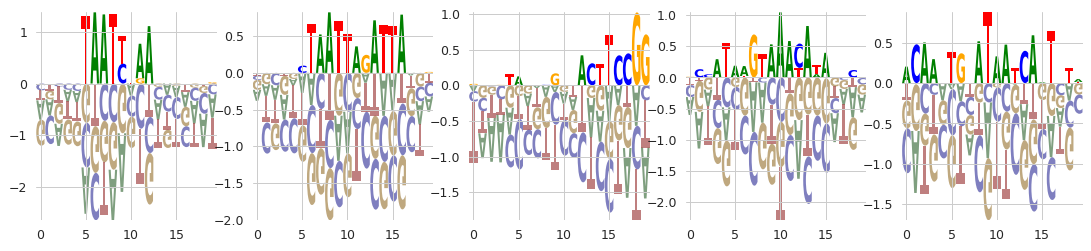

In [268]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 3
rcParams['figure.dpi'] = 90
mb.pl.conv_mono(binding_modes, n_cols=len(binding_modes), n_rows=1, title=False)

In [269]:
reduced_groups = mb.tl.reduce_filters(binding_modes)

iteration 1
# grouping (0, 0)
done. No more groups to generate


### Using the generated models, reload the data, set them up as priors, and relearn actitivies

In [270]:
import os

n_sample = 100
df = []

input_paths = glob.glob('../../../mubind-pipeline/output/snakemake/*/*/*/*.tsv.gz')
print(input_paths)
batch = 0
batch_by_name = {}
for p in input_paths:
    if not "ALX" in p:
        continue
    # print(p)
    df2 = pd.read_csv(p, sep='\t', index_col=0) # .head(100)
    assert 'batch' in df2
    # print(df2.columns)
    # df2 = df2.sample(100000)
    n_rounds = len(df2.columns) - 2
    df2.columns =  list(range(n_rounds)) + ['batch', 'is_count_data']
    df2['batch'] = batch
    batch_by_name[batch] = os.path.basename(p)
    df2['n_rounds'] = n_rounds
    # df2 = mb.pp.sample_rounds(df2, n_rounds, n_sample_per_round)
    print(df2.shape)
    df2 = df2.sample(n_sample)
    print(p, df2.shape, n_rounds)
    batch += 1
    df.append(df2)
    # assert False
    # break

df = pd.concat(df)
df = df[[c for c in df.columns if not c in ['batch', 'is_count_data', 'n_rounds']] + ['batch', 'is_count_data', 'n_rounds']]

['../../../mubind-pipeline/output/snakemake/ALX1/SELEX/prepare/ALX1-ZeroCycle_TACCAA40NTTA_0_0-TACCAA40NTTA_1000.tsv.gz', '../../../mubind-pipeline/output/snakemake/ALX1/SELEX/prepare/ALX1-ZeroCycle_TACCAA40NTTA_0_0-TACCAA40NTTA_10000.tsv.gz', '../../../mubind-pipeline/output/snakemake/ALX1/SELEX/prepare/ALX1-ZeroCycle_TCCTTG40NGGT_0_0-TCCTTG40NGGT_1000.tsv.gz', '../../../mubind-pipeline/output/snakemake/ALX1/SELEX/prepare/ALX1-ZeroCycle_TCCTTG40NGGT_0_0-TCCTTG40NGGT_10000.tsv.gz', '../../../mubind-pipeline/output/snakemake/ALX4/SELEX/prepare/ALX4-ZeroCycle_ES0_TGTGTC20NGA_0-TGTGTC20NGA_10000.tsv.gz', '../../../mubind-pipeline/output/snakemake/ALX4/SELEX/prepare/ALX4-ZeroCycle_TCTATT40NCAT_0_0-TCTATT40NCAT_10000.tsv.gz', '../../../mubind-pipeline/output/snakemake/ALX4/SELEX/prepare/ALX4-ZeroCycle_TGCGTA40NTCA_0_0-TGCGTA40NTCA_10000.tsv.gz', '../../../mubind-pipeline/output/snakemake/ALX4/SELEX/prepare/ALX4-ZeroCycle_TGTGTC20NGA_0_0-TGTGTC20NGA_10000.tsv.gz', '../../../mubind-pipeline/o

In [271]:
df['batch'].value_counts()

0    100
1    100
2    100
3    100
4    100
5    100
6    100
7    100
Name: batch, dtype: int64

In [272]:
dataset = mb.datasets.SelexDataset(df, n_rounds=df['n_rounds'], labels=list(df.columns[:-3]), store_rev=False)
train = tdata.DataLoader(dataset=dataset,
                         # batch_size=256,
                         batch_size=512,
                         shuffle=False)


In [273]:
# reduced_groups = reduced_groups[:2]
len(reduced_groups)

5

In [274]:
n_kernels = len(reduced_groups)

In [275]:

criterion = mb.tl.PoissonLoss()

n_rounds = train.dataset.n_rounds
n_batches = train.dataset.n_batches
enr_series = train.dataset.enr_series

model = mb.models.Multibind(
    datatype="selex",
    kernels=[0] + [m.shape[-1] for m in reduced_groups],
    n_rounds=n_rounds,
    init_random=False,
    n_batches=n_batches,
    enr_series=enr_series,
    dinuc_mode='full',
).to(device)

for i, mono_best in enumerate(reduced_groups):
    # print(mono_best.shape, model.binding_modes.conv_mono[i + 1].weight.shape)
    # print(model.binding_modes.conv_mono[i + 1].weight.device)
    new_w = mono_best.reshape([1, 1] + list(mono_best.shape))
    model.binding_modes.conv_mono[i + 1].weight = torch.nn.Parameter(torch.tensor(new_w, dtype=torch.float))
    # print(model.binding_modes.conv_mono[i + 1].weight.device)
# move the model a final time to the GPU
model = model.to(device)



True
6
(76, 76)
(76, 76)
(76, 76)
(76, 76)
(76, 76)


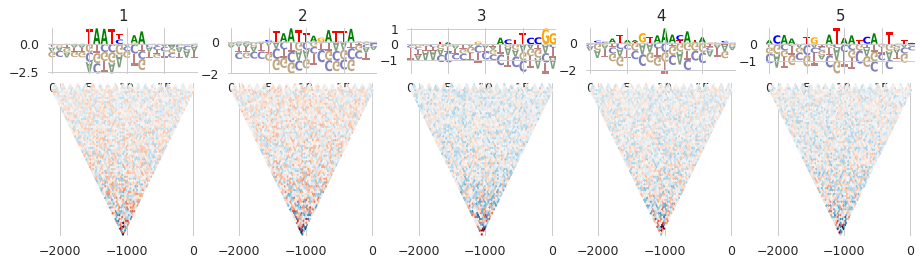

In [276]:
rcParams['figure.figsize'] = 15, 3
rcParams['figure.dpi'] = 90
mb.pl.conv(model, n_cols=len(reduced_groups), title=False, xticks=False, rowspan_dinuc=3, rowspan_mono=1)


True
6
(76, 76)
(76, 76)
(76, 76)
(76, 76)
(76, 76)


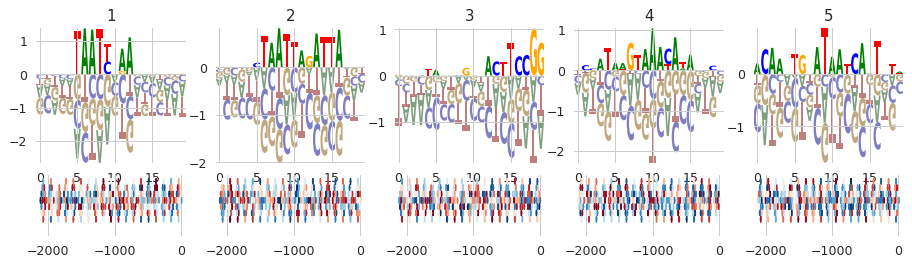

In [277]:
criterion = mb.tl.PoissonLoss()

n_rounds = train.dataset.n_rounds
n_batches = train.dataset.n_batches
enr_series = train.dataset.enr_series

model = mb.models.Multibind(
    datatype="selex",
    kernels=[0] + [m.shape[-1] for m in reduced_groups],
    n_rounds=n_rounds,
    init_random=False,
    n_batches=n_batches,
    enr_series=enr_series,
    dinuc_mode='local',
).to(device)

for i, mono_best in enumerate(reduced_groups):
    # print(mono_best.shape, model.binding_modes.conv_mono[i + 1].weight.shape)
    # print(model.binding_modes.conv_mono[i + 1].weight.device)
    new_w = mono_best.reshape([1, 1] + list(mono_best.shape))
    model.binding_modes.conv_mono[i + 1].weight = torch.nn.Parameter(torch.tensor(new_w, dtype=torch.float))
    # print(model.binding_modes.conv_mono[i + 1].weight.device)
# move the model a final time to the GPU
model = model.to(device)
mb.pl.conv(model, n_cols=len(reduced_groups), title=False, xticks=True, rowspan_mono=2, rowspan_dinuc=1)


In [278]:
def unfreeze(model, feat_lab=None, position=None):
    # block mononucleotide but free dinucleotide and activities to calibrate themselves during training
    verbose = 1
    for ki in range(n_kernels + 1):
        mask_pos = (ki == position if position is not None else True)
        mask_mono = (feat_lab == 'mono') and mask_pos
        mask_dinuc = (feat_lab == 'dinuc') and mask_pos
        if verbose != 0:
            print("setting grad status of kernel (mono, dinuc) at %i to (%i, %i)" % (ki, mask_mono, mask_dinuc))
        model.binding_modes.update_grad_mono(ki, mask_mono)
        model.binding_modes.update_grad_di(ki, mask_dinuc)

### Here we recalibrate first the log_activities and etas, by freezing mono/dinuc

In [279]:
unfreeze(model, None)
# upfreeze ns binding
model.binding_modes.update_grad_mono(0, True)
model.binding_modes.update_grad_di(0, True)

setting grad status of kernel (mono, dinuc) at 0 to (0, 0)
setting grad status of kernel (mono, dinuc) at 1 to (0, 0)
setting grad status of kernel (mono, dinuc) at 2 to (0, 0)
setting grad status of kernel (mono, dinuc) at 3 to (0, 0)
setting grad status of kernel (mono, dinuc) at 4 to (0, 0)
setting grad status of kernel (mono, dinuc) at 5 to (0, 0)


In [280]:
# assert False
next_optimiser = topti.Adam(model.parameters(), lr=0.025, weight_decay=0.001)
next_early_stopping = 25
log_each = 25
dirichlet_regularization = 0
exp_max = 40
verbose = 1
num_epochs = 1000

mb.tl.optimize_simple(
    model,
    train,
    device,
    next_optimiser,
    criterion,
    num_epochs=num_epochs,
    early_stopping=next_early_stopping,
    log_each=log_each,
    dirichlet_regularization=dirichlet_regularization,
    exp_max=exp_max,
    verbose=verbose,
)


optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 1000 
early_stopping: 25
lr= 0.025, weight_decay= 0.001, dir weight= 0
Epoch: 26, Loss: 2.379718,  best epoch: 24,  secs per epoch: 0.198 s,  secs epoch*1k trials: 0.247s
Epoch: 51, Loss: 1.844152,  best epoch: 49,  secs per epoch: 0.194 s,  secs epoch*1k trials: 0.242s
Epoch: 76, Loss: 1.521261,  best epoch: 74,  secs per epoch: 0.189 s,  secs epoch*1k trials: 0.236s
Epoch: 101, Loss: 1.325521,  best epoch: 99,  secs per epoch: 0.186 s,  secs epoch*1k trials: 0.233s
Epoch: 126, Loss: 1.182230,  best epoch: 124,  secs per epoch: 0.184 s,  secs epoch*1k trials: 0.230s
Epoch: 151, Loss: 1.084495,  best epoch: 149,  secs per epoch: 0.183 s,  secs epoch*1k trials: 0.229s
Epoch: 176, Loss: 1.019059,  best epoch: 174,  secs per epoch: 0.183 s,  secs epoch*1k trials: 0.228s
Epoch: 201, Loss: 0.970740,  best epoch: 199,  secs per epoch: 0.182 s,  secs epoch*1k trials: 0.228s
Epoch: 226, Loss: 0.932575,  best epoch: 224,  secs per epoch: 0.182

True
6
(76, 76)
(76, 76)
(76, 76)
(76, 76)
(76, 76)


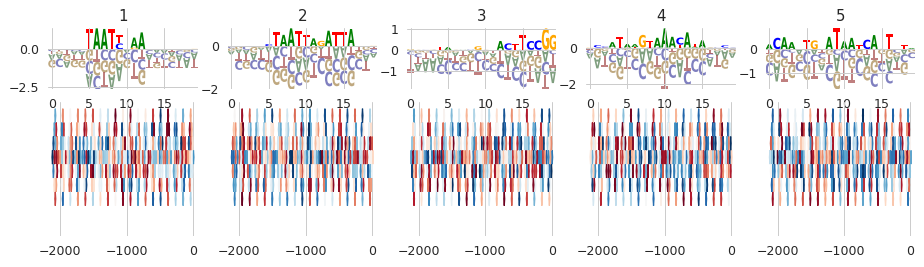

In [281]:
# plot kernels (they should look the same as before
mb.pl.conv(model, n_cols=len(reduced_groups), title=False, xticks=True, rowspan_mono=1, rowspan_dinuc=2)

<AxesSubplot: >

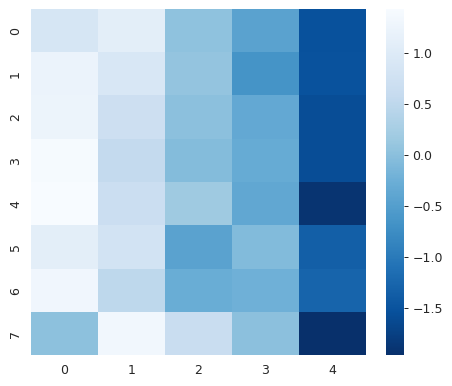

In [253]:
import seaborn as sns
rcParams['figure.figsize'] = 6, 5
sns.heatmap(model.get_log_etas().detach().cpu().numpy(), cmap='Blues_r')

In [254]:
rcParams['figure.figsize'] = 20, 20
# mb.pl.activities(model, n_cols=10, n_rows=8)

In [255]:
pd.DataFrame(mb.tl.scores(model, train, by='batch'))

,0,1,2,3,4,5,6,7
r2_counts,0.796023,0.469658,0.606977,0.966360,0.174564,0.076331,0.081200,0.295395
r2_foldchange,0.698530,0.434169,0.352127,0.623494,0.259545,0.099255,0.165215,0.371147
r2_enr,0.876454,0.672220,0.761931,0.966031,0.312888,0.112815,0.157659,0.557782
r2_fc,0.723470,0.498137,0.381767,0.639589,0.344785,0.162602,0.220450,0.440197
pearson_foldchange,0.850570,0.705788,0.617873,0.799743,0.587184,0.403239,0.469521,0.663473


In [256]:
for ki in range(1, len(reduced_groups) + 1):
    print('\nnext kernel to refine')
    unfreeze(model, 'mono', position=ki) # mono at 1
    # assert False
    next_optimiser = topti.Adam(model.parameters(), lr=0.025, weight_decay=0.001)
    next_early_stopping = 100
    log_each = 25
    dirichlet_regularization = 0
    exp_max = 40
    verbose = 1
    num_epochs = 250

    mb.tl.optimize_simple(
        model,
        train,
        device,
        next_optimiser,
        criterion,
        num_epochs=num_epochs,
        early_stopping=next_early_stopping,
        log_each=log_each,
        dirichlet_regularization=dirichlet_regularization,
        exp_max=exp_max,
        verbose=verbose,
    )



next kernel to refine
setting grad status of kernel (mono, dinuc) at 0 to (0, 0)
setting grad status of kernel (mono, dinuc) at 1 to (1, 0)
setting grad status of kernel (mono, dinuc) at 2 to (0, 0)
setting grad status of kernel (mono, dinuc) at 3 to (0, 0)
setting grad status of kernel (mono, dinuc) at 4 to (0, 0)
setting grad status of kernel (mono, dinuc) at 5 to (0, 0)
optimizer:  Adam 
criterion: PoissonLoss 
# epochs: 250 
early_stopping: 100
lr= 0.025, weight_decay= 0.001, dir weight= 0
Epoch: 26, Loss: 0.422277,  best epoch: 19,  secs per epoch: 0.185 s,  secs epoch*1k trials: 0.231s
Epoch: 51, Loss: 0.422189,  best epoch: 28,  secs per epoch: 0.182 s,  secs epoch*1k trials: 0.228s
Epoch: 76, Loss: 0.422185,  best epoch: 28,  secs per epoch: 0.181 s,  secs epoch*1k trials: 0.227s
Epoch: 101, Loss: 0.422183,  best epoch: 28,  secs per epoch: 0.181 s,  secs epoch*1k trials: 0.226s
Epoch: 126, Loss: 0.422183,  best epoch: 28,  secs per epoch: 0.181 s,  secs epoch*1k trials: 0.226

True
6
(76, 76)
(76, 76)
(76, 76)
(76, 76)
(76, 76)


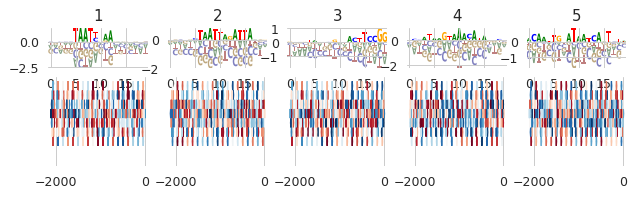

In [282]:
# plot kernels (they should look the same as before
rcParams['figure.figsize'] = 10, 2
mb.pl.conv(model, n_cols=len(reduced_groups), title=False, xticks=True, rowspan_mono=1, rowspan_dinuc=2)

## Exploratory: Compare the old/new r2 values generates by the individual vs reduced models

0
1
2
3
4
5
6
7


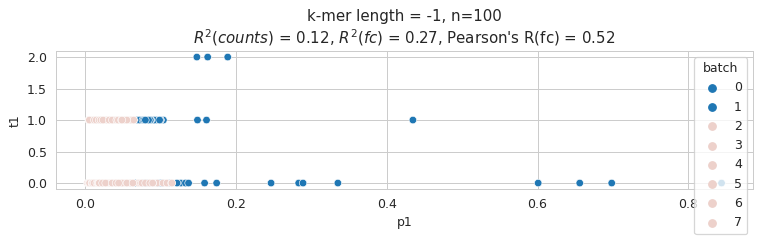

In [283]:
scores_by_batch = mb.pl.kmer_enrichment(model, train, log_scale=False, style='scatter', ylab='t1', xlab='p1', show=False, by='batch')
df_batch = pd.DataFrame(scores_by_batch).T

In [284]:
df_batch['filename'] = df_batch.index.astype(int).map(batch_by_name)
metrics['filename'] = list(metrics['counts_path'].apply(os.path.basename))

In [285]:
merged = df_batch.merge(metrics, on='filename', suffixes=('_independent', '_merged'))

xlab, ylab = 'r2_counts_independent', 'r2_counts_merged'
x, y = merged[xlab], merged[ylab]

import scipy
scipy.stats.pearsonr(x, y)

PearsonRResult(statistic=-1.0, pvalue=1.0)

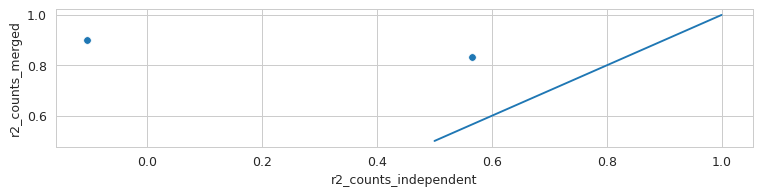

In [286]:
sns.scatterplot(data=merged, x=xlab, y=ylab)
plt.plot([.5, 1], [.5, 1])
